In [117]:
import torch
from torch import nn

torch.__version__

'2.5.1'

In [118]:
device = "cuda" if torch.cuda.is_available() else 'cpu'"05 computer_vision_video.ipynb"
device

'cuda'

## 1. Get Data

In [119]:
# this dataset is a subset of food101 dataset(from pytorch) only 10% of the images
# images: 1k
import requests
import zipfile
from pathlib import Path

In [120]:
# setup path to a data folder
data_path = Path('data')
image_path = data_path / "pizza_steak_sushi"

# exist_ok
if image_path.is_dir():
    print(f"{image_path} directory already exist... skip download")
else:
    print(f"{image_path} directory is being created...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# download pizza, steak, sushi
with open(data_path/"pizza_sushi_steak.zip", 'wb') as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, sushi, steak data...")
    f.write(request.content)

#Unzip data
with zipfile.ZipFile(data_path/"pizza_sushi_steak.zip", 'r') as zip_rep:
    print('Unzipping data...')
    zip_rep.extractall(image_path)

data\pizza_steak_sushi directory already exist... skip download
Unzipping data...


In [121]:
# data_path/"pizza_sushi_steak.zip"
image_path

WindowsPath('data/pizza_steak_sushi')

## 2. Becoming one with the data

In [122]:
import os

def walkthrough_dir(dir_path):
    """ Walks through dir_path returning its contents..."""

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [123]:
walkthrough_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [124]:
# setup training and testing paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1. Visualizing image

* get all image paths
* pick a random image path using `python` random.choice()
* get the image class name using `pathlib.path.parent.stem`
* since working with images, opwn image with PIL (pillow) `python`
* show the image and print metadata

data\pizza_steak_sushi\train\sushi\3579071.jpg
Random image path: data\pizza_steak_sushi\train\sushi\3579071.jpg
Image class: sushi
Image height: 512
Image width: 512


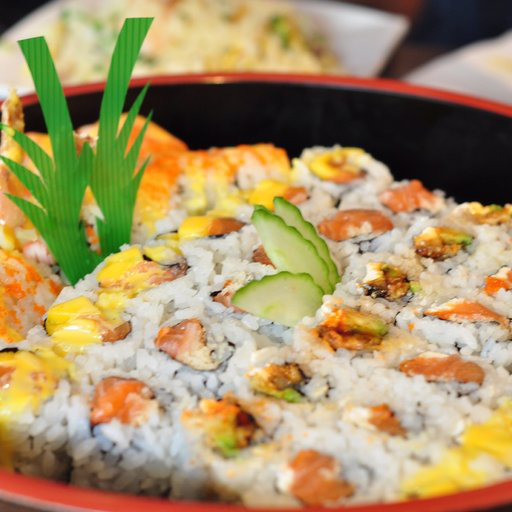

In [125]:
import random
from PIL import Image

# set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3.  get image class (name of directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

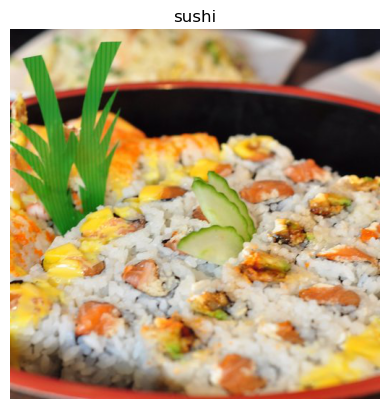

In [126]:
from matplotlib import pyplot as plt 

plt.imshow(img)
plt.title(image_class)
plt.axis(False)



## Transforming data

before we can use image data with pytorch, or any other type of dataset, we have to:

* turn target data into tensors
* turn it into `torch.utils.data.dataset` and subsequesntly a `torch.utils.data.dataloader`

In [127]:
import torch
from torch.utils.data import dataloader
from torchvision import datasets, transforms

### 3.1 Transformin data with `torchvision.transforms`

In [128]:
# write a transform for image
data_transform =  transforms.Compose([ # turn images into tensors
    # Resize images to (64,64)
    transforms.Resize(size=(224,224)),
    # Flip images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn image into a torch.Tensor
    transforms.ToTensor()
])

In [129]:
data_transform(img)

tensor([[[0.0863, 0.0863, 0.0863,  ..., 0.0588, 0.0588, 0.0627],
         [0.0863, 0.0863, 0.0863,  ..., 0.0588, 0.0627, 0.0627],
         [0.0863, 0.0863, 0.0863,  ..., 0.0627, 0.0627, 0.0667],
         ...,
         [0.1725, 0.1882, 0.2196,  ..., 0.3922, 0.4039, 0.4157],
         [0.1412, 0.1451, 0.1569,  ..., 0.3922, 0.3961, 0.4000],
         [0.1569, 0.1529, 0.1529,  ..., 0.3843, 0.3843, 0.3843]],

        [[0.0863, 0.0863, 0.0863,  ..., 0.0510, 0.0510, 0.0549],
         [0.0863, 0.0863, 0.0863,  ..., 0.0510, 0.0549, 0.0549],
         [0.0863, 0.0863, 0.0863,  ..., 0.0549, 0.0549, 0.0588],
         ...,
         [0.0980, 0.1020, 0.1059,  ..., 0.2510, 0.2667, 0.2745],
         [0.0863, 0.0902, 0.0863,  ..., 0.2549, 0.2588, 0.2706],
         [0.0863, 0.0824, 0.0863,  ..., 0.2627, 0.2706, 0.2745]],

        [[0.1255, 0.1255, 0.1255,  ..., 0.0627, 0.0627, 0.0667],
         [0.1255, 0.1255, 0.1255,  ..., 0.0627, 0.0667, 0.0667],
         [0.1255, 0.1255, 0.1255,  ..., 0.0667, 0.0667, 0.

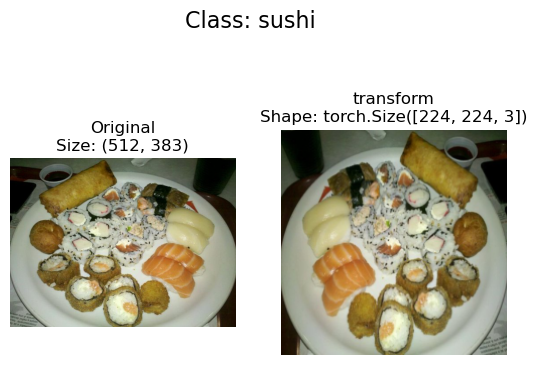

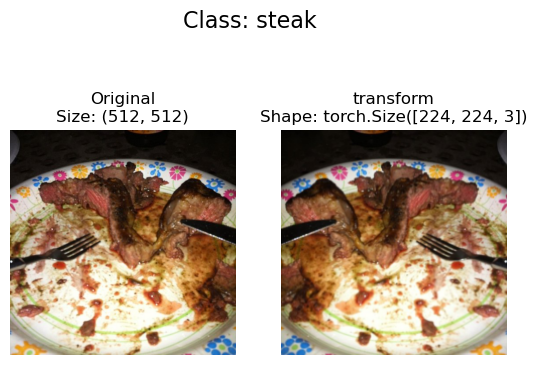

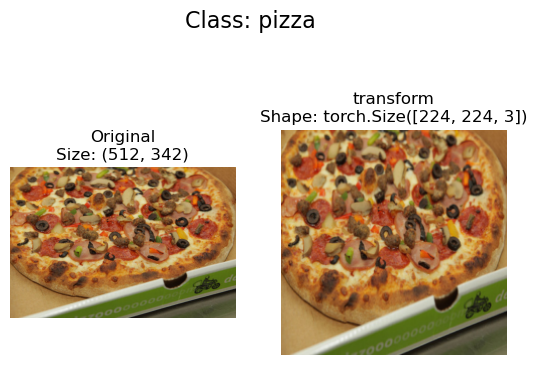

In [130]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    """ 
    Selects random images from a path of images and loads/transforms them then plots the original vs the transformed version
    """

    if seed: random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transform\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)



### 4. Option 1: Loading image data using `ImageFolder`

In [131]:
# Use imagefoler to create a dataset
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transform for the data
                                  target_transform = None) # transform for the target/label

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [132]:
# Get class names as a list
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [133]:
# get classnames as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [134]:
# check the length of the dataset
len(train_data), len(test_data)

(225, 75)

In [135]:
# Index on the train_data Dataset to get a single image and its label
img, label = train_data[0][0], train_data[0][1] 
# print(f"Image tensor:\m {img}")
print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Image label: {label}")
print(f"label dtype: {type(label)}")

Image shape: torch.Size([3, 224, 224])
Image dtype: torch.float32
Image label: 0
label dtype: <class 'int'>


Original image shape: torch.Size([3, 224, 224]) -> [color channels, height, width]
Image permute: torch.Size([224, 224, 3]) -> [height, width, color channels]


Text(0.5, 1.0, 'pizza')

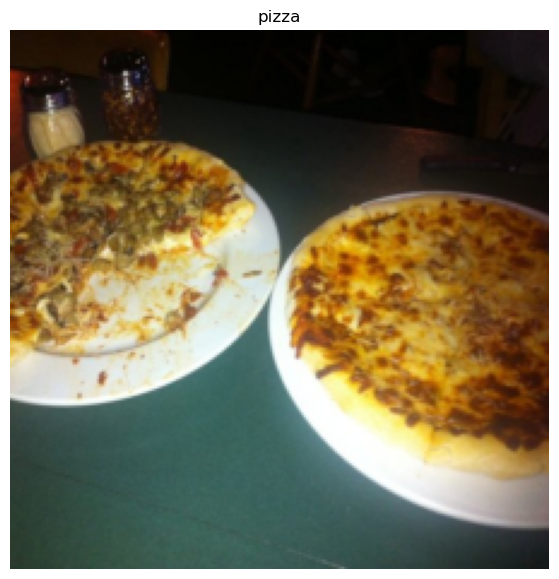

In [136]:
# Rearreange the orader dimensions of the image tensor
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original image shape: {img.shape} -> [color channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color channels]") 

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute) 
plt.axis(False) 
plt.title(class_name[label])

## 4.1 images -> dataloader

In [137]:
from torch.utils.data import DataLoader

# Create a DataLoader
# data loader turns the data into batches(iterable)
# batch size is the number of images the model sees at once (machine will bear less load))

BATCH_SIZE = 1

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ef96801ab0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ef969e6020>)

In [138]:
len(train_dataloader), len(test_dataloader) # number of batches 

(225, 75)

In [139]:
img, label = next(iter(train_dataloader))

img.shape, label # shape: [batch_size, color_channels, height, width]

(torch.Size([1, 3, 224, 224]), tensor([0]))

## Loading image data with a custom dataset

* load images from file
* get class names from the dataset
* get classese as dictionary from the Dataset

__pros:__
* can create a dataset out of almost anything
* not limited to pytorch pre-build `Dataset` functions

__cons:__
* even if dataset can be created from almost anything, it doesnt mean it would work
* using a custom `Dataset` often result into more code writing | *prone to preformance issues*

In [140]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [141]:
# Instance of torchvision.datasets.ImageFolder()

train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

function:
* get class names using `os.scandir()` to traverse a target directory
* raise an error if the class names arent found
* turn class names into a dict and a list and return them

In [142]:
# Setup path for target directory

target_directory = train_dir
print(f"Target directory: {target_directory}") 

# Get the class names from the target directory
class_names_found= sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target directory: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [143]:
def find_classes(target_directory: str) -> Tuple[List[str], Dict[str, int]]:
    """
    Returns a list of class names found
    """

    # Get the class names from the target directory
    classes = sorted([entry.name for entry in list(os.scandir(target_directory))])

    # Raise and error if class names are not found
    if not classes:
        raise FileNotFoundError(f"coundt find any class names in {target_directory}")
    
    # create a dictionary of index labesl for class names
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
      
    return classes, class_to_idx

In [144]:
classes = find_classes(target_directory)[0]

### 5.2 Create a custon `Dataset` to replicate `ImageFolder`
*Not necessary only for understanding |`ImageFolder` already exist(tested)*

* Subclass `torch.utils.data.Dataset`
* Init a subclass with a target directory and transform if wanted
*create several attributes:
    * paths - paths to the images
    * transform - transform to be used
    * classes - list of the target classes
* create a function to `load_images()` *this function will open an image*
* overwrite the `__len()__` method to return the length of our dataset
* Overwrite the ``__getitem()__` method to return a given samples when passed an index

In [145]:
# Write a custon dataset class
from torch.utils.data import Dataset

# subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # Initialize custom dataset
    def __init__(self, target_directory: str, transform=None):
        # Create class attributes
        # Get all the image paths
        self.paths = list(pathlib.Path(target_directory).rglob("*/*.jpg"))
        
        # setup the transform
        self.transform = transform

        # create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(target_directory)

    # Create a function to load images
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]  
        return Image.open(image_path)
    
    # Overwrite __len__ method
    def __len__(self) -> int:
        """
        Returns the total number of images in the dataset.
        """
        return len(self.paths)
    
    # Overwrite __getitem__ method
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        # Load image
        image_path = self.paths[index]  # Ensure this is correct
        image = self.load_image(index)
        
        # Get the class name
        class_name = pathlib.Path(image_path).parent.name
        
        # Get the class index
        try:
            class_index = self.class_to_idx[class_name]
        except KeyError:
            raise KeyError(f"Class name '{class_name}' not found in class_to_idx mapping.")
        
        # Apply transformation
        if self.transform:
            image = self.transform(image)
        
        return image, class_index


    

In [146]:
# Create a trandform for the data
train_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [147]:
# Test out image folder custom
train_data_custom = ImageFolderCustom(target_directory=train_dir,
                                      transform=train_transform)

test_data_custom = ImageFolderCustom(target_directory=test_dir, 
                                     transform=test_transform)

In [148]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1ef96803340>,
 <__main__.ImageFolderCustom at 0x1ef968039d0>)

In [149]:
len(train_data), len(train_data_custom)

(225, 225)

In [150]:
len(test_data), len(test_data_custom)

(75, 75)

In [151]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [152]:
# check for equality between original and custom dataset

print([train_data_custom.classes, test_data_custom.classes] == [train_data.classes, test_data.classes])

True


### 5.3 Create a function to display random images

* Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize
* To prevent the display getting out of hand, let's camp the number of images to see at 10
* set random seed
* get a list of random samples indexes from the target dataset
* setyp a matplotlib plot
* loop through a random images and plot with plt
* make sure the dimensions of images line up with matplotlib

In [153]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # Adjust display if n is too large
    if n > 10:
        n = 10
        display_shape = False
        print("n is too large, only 10 images will be displayed")   

    # Set seed
    if seed: 
        random.seed(seed)

    # Get random indices
    random_sample_indices = random.sample(range(len(dataset)), k=n)

    # Set up the figure
    plt.figure(figsize=(16, 6))

    # Loop through random indices, plot images and labels
    for i, targ_sample in enumerate(random_sample_indices):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # Adjust tensor dimensions for plotting
        targ_image = targ_image.permute(1, 2, 0)  # [color_channels, height, width] -> [height, width, color_channels]

        # Plot adjusted samples
        plt.subplot(1, 10, i + 1)
        plt.imshow(targ_image)
        plt.axis(False)

        if classes:
            plt.title(classes[targ_label])
            if display_shape:
                plt.xlabel(targ_image.shape)

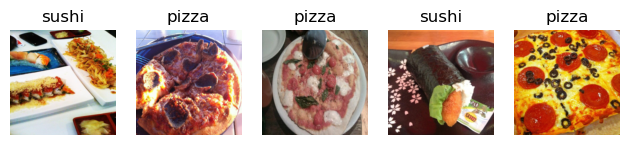

In [154]:
# display random images from the imagefolder

display_random_images(dataset=train_data,
                      classes=class_names_found,
                      n=5,
                      seed=42)

n is too large, only 10 images will be displayed


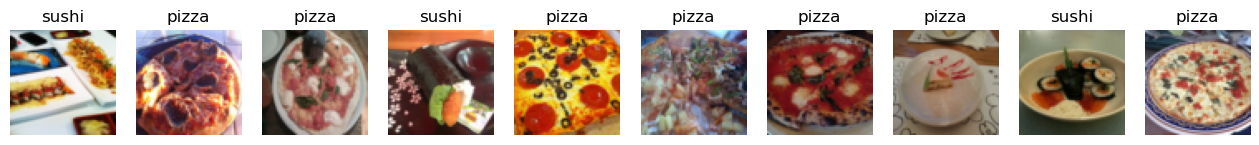

In [155]:
# Display random images from the custom dataset
display_random_images(dataset=train_data_custom,
                      classes=train_data_custom.classes,
                      n=20, 
                      seed=42)

In [156]:
# Test indexing
image, label = train_data_custom[0]
print(type(image), label)  # Should print the image tensor type and label


<class 'torch.Tensor'> 0
